In [1]:
# target: annotxxx.csv
# PCA for intra-group

# distribution of the column sum

# concat the intra-group into one
# random shuffle

# train-test split (0.8-0.2)

In [2]:
import os
import csv
import pandas as pd
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
# Define the directory where the CSV files are stored
directory = os.getcwd()

annot_mild = []
annot_severe = []
annot_control = []

# Read the CSV files back into the original variables
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        if "annot_0_" in filename:
            df = pd.read_csv(os.path.join(directory, filename))
            annot_mild.append(df)  # Set the index
        elif "annot_1_" in filename:
            df = pd.read_csv(os.path.join(directory, filename))
            annot_severe.append(df)  # Set the index
        elif "annot_2_" in filename:
            df = pd.read_csv(os.path.join(directory, filename))
            annot_control.append(df)  # Set the index


# Verify the DataFrames have been read back correctly
for df in annot_mild + annot_severe + annot_control:
    print(df.shape)

(648, 751)
(3972, 751)
(3758, 751)
(648, 751)
(3972, 751)
(3758, 751)
(2124, 751)
(8310, 751)
(3279, 751)
(1907, 751)
(8660, 751)
(2576, 751)


In [4]:
annot_mild[0][annot_mild[0].columns[:-1]].head()

,MTRNR2L12,HBB,MTRNR2L8,TAOK1,FTL,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,...,HERC5,CES1,EIF2S2,HLA-DRB1,RPL38,CXCL10,ACTG1,CANX,HNRNPA2B1,CSTB
0,0,2,0,10,3,5,0,2,7,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,5,21,3,2,9,4,2,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,8,5,10,1,26,32,16,...,0,0,0,0,0,0,0,0,0,0
3,0,649,0,4,8,2,2,7,11,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,6,0,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0


In [5]:
annot_mild[0]['dataset'] = 'GSM4339772'
annot_mild[0]['nCoV'] = 'mild'
annot_mild[0].head()

,MTRNR2L12,HBB,MTRNR2L8,TAOK1,FTL,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,...,HLA-DRB1,RPL38,CXCL10,ACTG1,CANX,HNRNPA2B1,CSTB,celltype,dataset,nCoV
0,0,2,0,10,3,5,0,2,7,0,...,0,0,0,0,0,0,0,B,GSM4339772,mild
1,9,0,0,5,21,3,2,9,4,2,...,0,0,0,0,0,0,0,Macrophages,GSM4339772,mild
2,4,0,0,8,5,10,1,26,32,16,...,0,0,0,0,0,0,0,T,GSM4339772,mild
3,0,649,0,4,8,2,2,7,11,2,...,0,0,0,0,0,0,0,Macrophages,GSM4339772,mild
4,0,0,0,4,6,0,1,1,1,3,...,0,0,0,0,0,0,0,mDC,GSM4339772,mild


In [6]:
annot_mild[1]['dataset'] = 'GSM4339770'
annot_mild[1]['nCoV'] = 'mild'
annot_mild[2]['dataset'] = 'GSM4339769'
annot_mild[2]['nCoV'] = 'mild'

annot_severe[0]['dataset'] = 'GSM4339774'
annot_severe[0]['nCoV'] = 'severe'
annot_severe[1]['dataset'] = 'GSM4339771'
annot_severe[1]['nCoV'] = 'severe'
annot_severe[2]['dataset'] = 'GSM4339773'
annot_severe[2]['nCoV'] = 'severe'

annot_control[0]['dataset'] = 'GSM4475052'
annot_control[0]['nCoV'] = 'control'
annot_control[1]['dataset'] = 'GSM4475049'
annot_control[1]['nCoV'] = 'control'
annot_control[2]['dataset'] = 'GSM4475053'
annot_control[2]['nCoV'] = 'control'
annot_control[3]['dataset'] = 'GSM4475051'
annot_control[3]['nCoV'] = 'control'
annot_control[4]['dataset'] = 'GSM4475048'
annot_control[4]['nCoV'] = 'control'
annot_control[5]['dataset'] = 'GSM4475050'
annot_control[5]['nCoV'] = 'control'

In [7]:
mild_df = pd.concat([annot_mild[0], annot_mild[1], annot_mild[2]], axis = 0)
severe_df = pd.concat([annot_severe[0], annot_severe[1], annot_severe[2]], axis = 0)
control_df = pd.concat([annot_control[0], annot_control[1], annot_control[2], annot_control[3], annot_control[4], annot_control[5]], axis = 0)

mild_df = mild_df.drop('sample', axis = 1)
severe_df = severe_df.drop('sample', axis = 1)
control_df = control_df.drop('sample', axis = 1)

In [8]:
mild_df.head()

,MTRNR2L12,HBB,MTRNR2L8,TAOK1,FTL,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,...,HLA-DRB1,RPL38,CXCL10,ACTG1,CANX,HNRNPA2B1,CSTB,celltype,dataset,nCoV
0,0,2,0,10,3,5,0,2,7,0,...,0,0,0,0,0,0,0,B,GSM4339772,mild
1,9,0,0,5,21,3,2,9,4,2,...,0,0,0,0,0,0,0,Macrophages,GSM4339772,mild
2,4,0,0,8,5,10,1,26,32,16,...,0,0,0,0,0,0,0,T,GSM4339772,mild
3,0,649,0,4,8,2,2,7,11,2,...,0,0,0,0,0,0,0,Macrophages,GSM4339772,mild
4,0,0,0,4,6,0,1,1,1,3,...,0,0,0,0,0,0,0,mDC,GSM4339772,mild


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
pca = PCA()

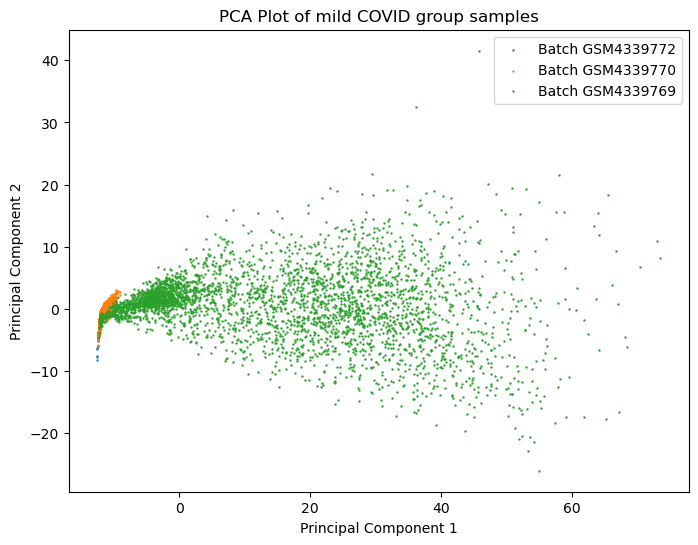

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have already initialized mild_df, scaler, and pca

# Extracting features and labels
mild_X = mild_df.iloc[:, :749]
mild_y = mild_df['dataset']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mild_X)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components and batch labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
mild_y_reset_index = mild_y.reset_index(drop=True)
pca_df['Batch'] = mild_y_reset_index

# Plot the PCA graph
plt.figure(figsize=(8, 6))
for batch_label in pca_df['Batch'].unique():
    plt.scatter(pca_df.loc[pca_df['Batch'] == batch_label, 'PC1'],
                pca_df.loc[pca_df['Batch'] == batch_label, 'PC2'],
                label=f'Batch {batch_label}', s = 0.5)

plt.title('PCA Plot of mild COVID group samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

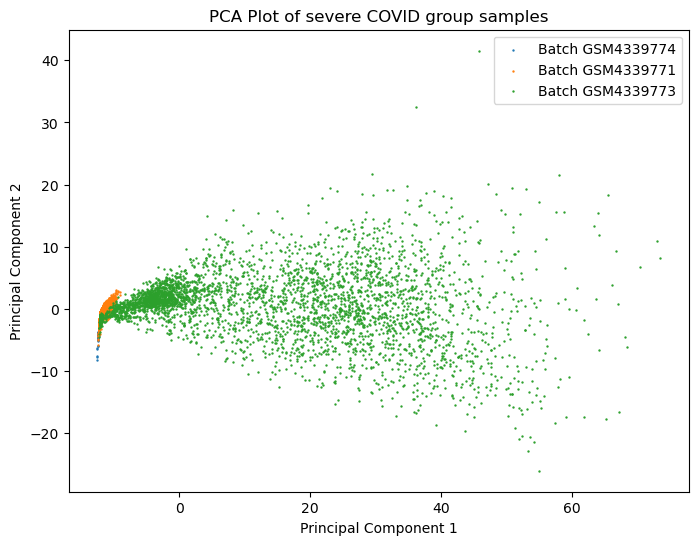

In [11]:
# Extracting features and labels
severe_X = severe_df.iloc[:, :749]
severe_y = severe_df['dataset']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(severe_X)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components and batch labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
severe_y_reset_index = severe_y.reset_index(drop=True)
pca_df['Batch'] = severe_y_reset_index

# Plot the PCA graph
plt.figure(figsize=(8, 6))
for batch_label in pca_df['Batch'].unique():
    plt.scatter(pca_df.loc[pca_df['Batch'] == batch_label, 'PC1'],
                pca_df.loc[pca_df['Batch'] == batch_label, 'PC2'],
                label=f'Batch {batch_label}', s = 0.5)

plt.title('PCA Plot of severe COVID group samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

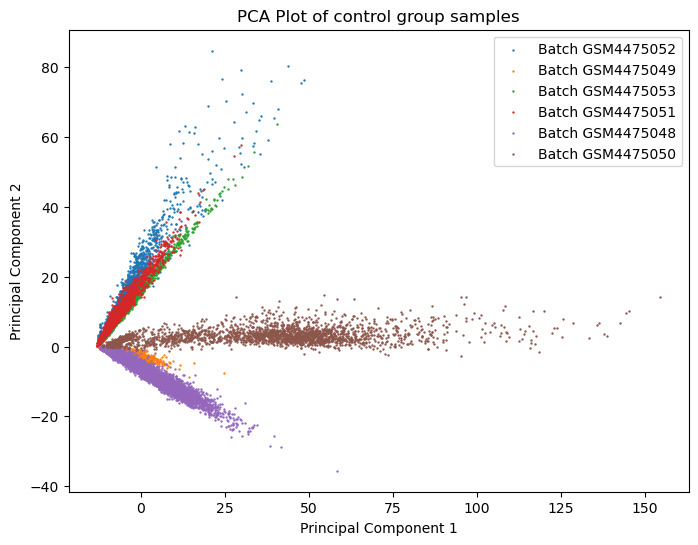

In [12]:
# Extracting features and labels
control_X = control_df.iloc[:, :749]
control_y = control_df['dataset']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(control_X)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components and batch labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
control_y_reset_index = control_y.reset_index(drop=True)
pca_df['Batch'] = control_y_reset_index

# Plot the PCA graph
plt.figure(figsize=(8, 6))
for batch_label in pca_df['Batch'].unique():
    plt.scatter(pca_df.loc[pca_df['Batch'] == batch_label, 'PC1'],
                pca_df.loc[pca_df['Batch'] == batch_label, 'PC2'],
                label=f'Batch {batch_label}', s = 0.5)

plt.title('PCA Plot of control group samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

There could be a risk of batch effect

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Perform train-test split for mild data
mild_X_train, mild_X_test, mild_y_train, mild_y_test = train_test_split(mild_df.iloc[:, :749], mild_df['celltype'], test_size=0.2, random_state=42)

# Perform train-test split for severe data
severe_X_train, severe_X_test, severe_y_train, severe_y_test = train_test_split(severe_df.iloc[:, :749], severe_df['celltype'], test_size=0.2, random_state=42)

# Perform train-test split for control data
control_X_train, control_X_test, control_y_train, control_y_test = train_test_split(control_df.iloc[:, :749], control_df['celltype'], test_size=0.2, random_state=42)

# Save the train and test data to CSV files
mild_X_train.to_csv('mild_X_train.csv', index=False)
mild_X_test.to_csv('mild_X_test.csv', index=False)
mild_y_train.to_csv('mild_y_train.csv', index=False)
mild_y_test.to_csv('mild_y_test.csv', index=False)

severe_X_train.to_csv('severe_X_train.csv', index=False)
severe_X_test.to_csv('severe_X_test.csv', index=False)
severe_y_train.to_csv('severe_y_train.csv', index=False)
severe_y_test.to_csv('severe_y_test.csv', index=False)

control_X_train.to_csv('control_X_train.csv', index=False)
control_X_test.to_csv('control_X_test.csv', index=False)
control_y_train.to_csv('control_y_train.csv', index=False)
control_y_test.to_csv('control_y_test.csv', index=False)

In [14]:
all_df = pd.concat([mild_df, severe_df, control_df], axis = 0)
all_df_X_train, all_df_X_test, all_df_y_train, all_df_y_test = train_test_split(all_df.iloc[:, :749], all_df['celltype'], test_size=0.2, random_state=42)

all_df_X_train.to_csv('all_df_X_train.csv', index=False)
all_df_X_test.to_csv('all_df_X_test.csv', index=False)
all_df_y_train.to_csv('all_df_y_train.csv', index=False)
all_df_y_test.to_csv('all_df_y_test.csv', index=False)

In [15]:
all_df.head()

,MTRNR2L12,HBB,MTRNR2L8,TAOK1,FTL,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,...,HLA-DRB1,RPL38,CXCL10,ACTG1,CANX,HNRNPA2B1,CSTB,celltype,dataset,nCoV
0,0,2,0,10,3,5,0,2,7,0,...,0,0,0,0,0,0,0,B,GSM4339772,mild
1,9,0,0,5,21,3,2,9,4,2,...,0,0,0,0,0,0,0,Macrophages,GSM4339772,mild
2,4,0,0,8,5,10,1,26,32,16,...,0,0,0,0,0,0,0,T,GSM4339772,mild
3,0,649,0,4,8,2,2,7,11,2,...,0,0,0,0,0,0,0,Macrophages,GSM4339772,mild
4,0,0,0,4,6,0,1,1,1,3,...,0,0,0,0,0,0,0,mDC,GSM4339772,mild


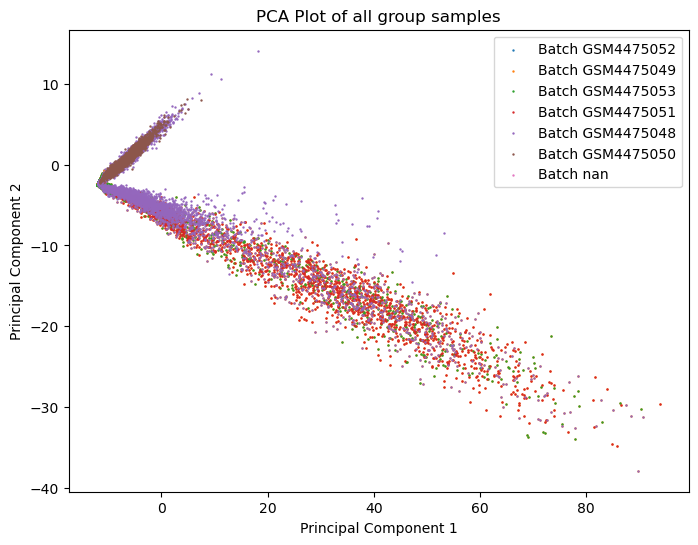

In [16]:
# Extracting features and labels
all_df_X = all_df.iloc[:, :749]
all_df_y = all_df['dataset']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_df_X)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components and batch labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
all_df_y_reset_index = control_y.reset_index(drop=True)
pca_df['Batch'] = all_df_y_reset_index

# Plot the PCA graph
plt.figure(figsize=(8, 6))
for batch_label in pca_df['Batch'].unique():
    plt.scatter(pca_df.loc[pca_df['Batch'] == batch_label, 'PC1'],
                pca_df.loc[pca_df['Batch'] == batch_label, 'PC2'],
                label=f'Batch {batch_label}', s = 0.5)

plt.title('PCA Plot of all group samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()